# Navie Bayes  

## 案例1. 肿瘤预测

1.1 读取数据

In [2]:
import pandas as pd
df = pd.read_excel('肿瘤数据.xlsx')
df.head()

,最大周长,最大凹陷度,平均凹陷度,最大面积,最大半径,平均灰度值,肿瘤性质
0,184.60,0.2654,0.14710,2019.0,25.38,17.33,0
1,158.80,0.1860,0.07017,1956.0,24.99,23.41,0
2,152.50,0.2430,0.12790,1709.0,23.57,25.53,1
3,98.87,0.2575,0.10520,567.7,14.91,26.50,0
4,152.20,0.1625,0.10430,1575.0,22.54,16.67,0


1.2 划分特征变量和目标变量

In [3]:
X = df.drop(columns='肿瘤性质') 
y = df['肿瘤性质']   

1.3 模型搭建

1.3.1 划分训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

1.3.2 朴素贝叶斯模型

In [12]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()  # 高斯朴素贝叶斯模型
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print("ACC:",accuracy_score(y_pred, y_test))

ACC: 0.9473684210526315


## 案例2： 垃圾邮件分类

In [1]:
# 读取spam.csv文件
import pandas as pd
df = pd.read_csv("spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# 重命名数据中的v1和v2列，使得拥有更好的可读性
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# 把'ham'和'spam'标签重新命名为数字0和1
df['Label'] = df['Label'].map({'ham':0, 'spam':1})
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# 统计有多少个ham，有多少个spam
print ("Num of ham : ", len(df[df.Label == 0]), " Num of spam: ", len(df[df.Label == 1]))
print ("Num of total samples: ", len(df))
print("Percent of ham:", len(df[df.Label == 0])/len(df))

Num of ham :  4825  Num of spam:  747
Num of total samples:  5572
Percent of ham: 0.8659368269921034


数据集极不平衡，正常邮件占比达86%。

the minimum length is:  2


d:\1_Software\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


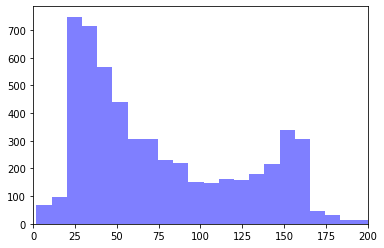

In [5]:
# 统计文本的长度信息
text_lengths = [len(df.loc[i,'Text']) for i in range(len(df))] 
print ("the minimum length is: ", min(text_lengths))

import matplotlib.pyplot as plt

plt.hist(text_lengths, 100, facecolor='blue', alpha=0.5)
plt.xlim([0,200])
plt.show()


In [6]:
# 导入英文的停用词库
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# stop wordS： he she the an a that this ...
stopset = set(stopwords.words("english"))

# 构建文本的向量 （基于词频的表示）
#vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()

# sparse matrix 
X = vectorizer.fit_transform(df.Text)
y = df.Label

In [7]:
# 把数据分成训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print ("训练数据中的样本个数: ", X_train.shape[0], "测试数据中的样本个数: ", X_test.shape[0])

训练数据中的样本个数:  4457 测试数据中的样本个数:  1115


In [8]:
# 利用朴素贝叶斯做训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

# 打印混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0, 1])

accuracy on test data:  0.97847533632287


array([[956,  14],
       [ 10, 135]], dtype=int64)

In [12]:
help(MultinomialNB())

Help on MultinomialNB in module sklearn.naive_bayes object:

class MultinomialNB(_BaseDiscreteNB)
 |  MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multinomial models
 |  
 |  The multinomial Naive Bayes classifier is suitable for classification with
 |  discrete features (e.g., word counts for text classification). The
 |  multinomial distribution normally requires integer feature counts. However,
 |  in practice, fractional counts such as tf-idf may also work.
 |  
 |  Read more in the :ref:`User Guide <multinomial_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  fit_prior : bool, default=True
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior will be used.
 |  
 |  class_prior : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classe